In [2]:
import zipfile

with zipfile.ZipFile('open.zip','r') as zip_file:
    zip_file.extractall('')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [195]:
train_data = pd.read_csv("open/train.csv")
test_data = pd.read_csv("open/test.csv")
sample_submission = pd.read_csv("open/sample_submission.csv")
international_trade = pd.read_csv('open/international_trade.csv')

In [26]:
sample_submission.head()

,ID,answer
0,TG_A_J_20230304,0
1,TG_A_J_20230305,0
2,TG_A_J_20230306,0
3,TG_A_J_20230307,0
4,TG_A_J_20230308,0


In [27]:
train_data.head()

,ID,timestamp,item,corporation,location,supply(kg),price(원/kg)
0,TG_A_J_20190101,2019-01-01,TG,A,J,0.0,0.0
1,TG_A_J_20190102,2019-01-02,TG,A,J,0.0,0.0
2,TG_A_J_20190103,2019-01-03,TG,A,J,60601.0,1728.0
3,TG_A_J_20190104,2019-01-04,TG,A,J,25000.0,1408.0
4,TG_A_J_20190105,2019-01-05,TG,A,J,32352.0,1250.0


In [60]:
test_data.head()

,ID,timestamp,item,corporation,location
0,TG_A_J_20230304,2023-03-04,TG,A,J
1,TG_A_J_20230305,2023-03-05,TG,A,J
2,TG_A_J_20230306,2023-03-06,TG,A,J
3,TG_A_J_20230307,2023-03-07,TG,A,J
4,TG_A_J_20230308,2023-03-08,TG,A,J


In [41]:
train_data['location'].value_counts()

location
J    35029
S    24368
Name: count, dtype: int64

In [30]:
# item에 따라 수량이 다르다
train_data['item'].value_counts()

item
TG    15230
BC    13707
RD    12184
CR    10661
CB     7615
Name: count, dtype: int64

In [31]:
train_data['timestamp'] = pd.to_datetime(train_data['timestamp'])

In [117]:
train_data['month'] = train_data['timestamp'].dt.month
train_data['year'] = train_data['timestamp'].dt.year
train_data['weeknum'] = train_data['timestamp'].dt.dayofweek
train_data['dayofyear'] = train_data['timestamp'].dt.dayofyear
train_data['day'] = train_data['timestamp'].dt.day
train_data['weekday'] = train_data['timestamp'].dt.day_name()

### 품목별 EDA

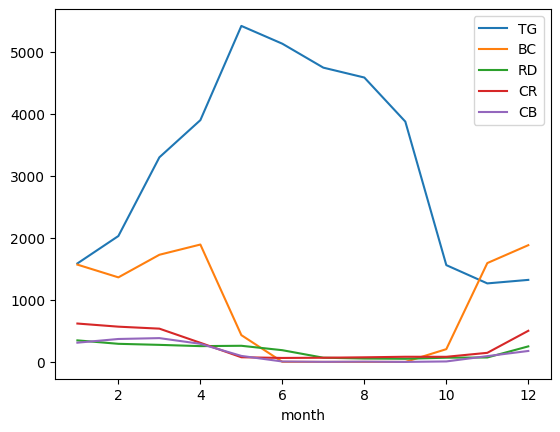

In [45]:
train_data.query('item == "TG"').groupby('month')['price(원/kg)'].mean().plot()
train_data.query('item == "BC"').groupby('month')['price(원/kg)'].mean().plot()
train_data.query('item == "RD"').groupby('month')['price(원/kg)'].mean().plot()
train_data.query('item == "CR"').groupby('month')['price(원/kg)'].mean().plot()
train_data.query('item == "CB"').groupby('month')['price(원/kg)'].mean().plot()
plt.legend(['TG','BC','RD','CR','CB'])

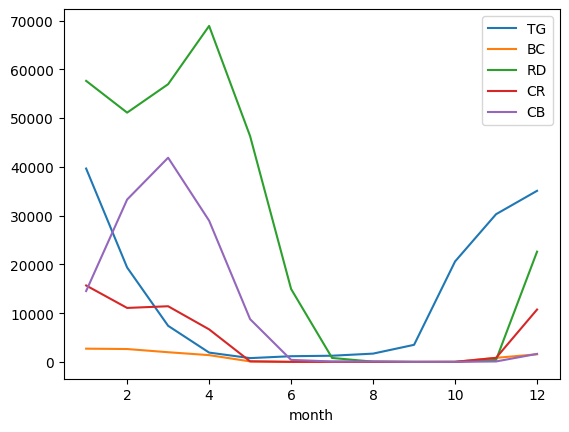

In [46]:
train_data.query('item == "TG"').groupby('month')['supply(kg)'].mean().plot()
train_data.query('item == "BC"').groupby('month')['supply(kg)'].mean().plot()
train_data.query('item == "RD"').groupby('month')['supply(kg)'].mean().plot()
train_data.query('item == "CR"').groupby('month')['supply(kg)'].mean().plot()
train_data.query('item == "CB"').groupby('month')['supply(kg)'].mean().plot()
plt.legend(['TG','BC','RD','CR','CB'])

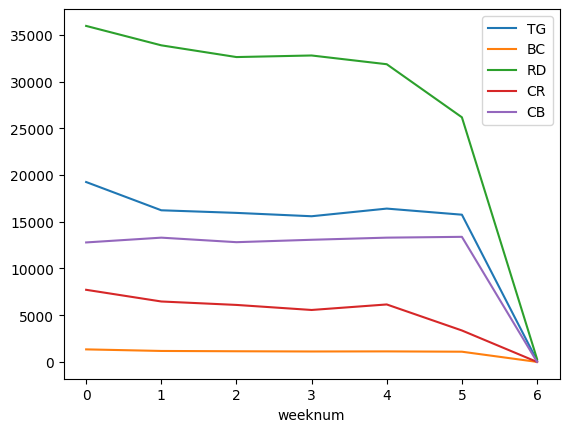

In [63]:
train_data.query('item == "TG"').groupby('weeknum')['supply(kg)'].mean().plot()
train_data.query('item == "BC"').groupby('weeknum')['supply(kg)'].mean().plot()
train_data.query('item == "RD"').groupby('weeknum')['supply(kg)'].mean().plot()
train_data.query('item == "CR"').groupby('weeknum')['supply(kg)'].mean().plot()
train_data.query('item == "CB"').groupby('weeknum')['supply(kg)'].mean().plot()
plt.legend(['TG','BC','RD','CR','CB'])

In [50]:
pd.pivot_table(data=train_data, columns=['corporation','location'], index='item', values='supply(kg)', aggfunc=np.mean)

corporation            A                          B                \
location               J             S            J             S   
item                                                                
BC           3342.239330   1261.065660   341.500985      9.607354   
CB            839.503283     92.740643          NaN           NaN   
CR           3627.016415           NaN  1627.590282           NaN   
RD           8151.622193   8813.893631          NaN           NaN   
TG           8866.744911  27735.338214  6853.761182  21009.736802   

corporation             C                           D               \
location                J             S             J            S   
item                                                                 
BC             146.214051      5.072882    868.916546          NaN   
CB                    NaN           NaN   2320.127380          NaN   
CR            1868.154957           NaN  13390.955351    31.149048   
RD                    NaN    143.805647   5666.256074  7035.883125   
TG           14562.166579  29598.235850   5754.740709  6570.480827   

corporation             E                            F  
location                J             S              J  
item                                                    
BC            2497.109652    528.814183            NaN  
CB            1719.970453           NaN   51235.321077  
CR           14635.134603    199.133290            NaN  
RD            3627.051871   1623.532502  186304.674984  
TG            7497.655745  13483.564018            NaN

<Axes: >

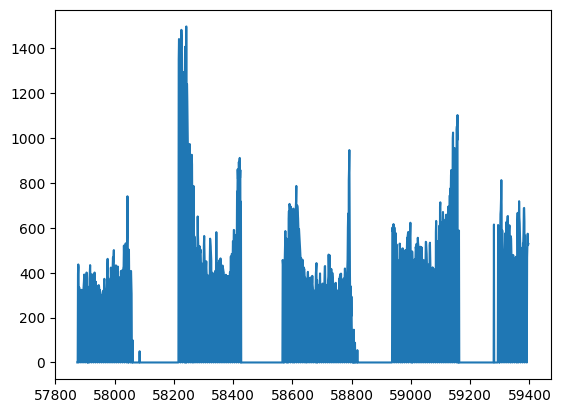

In [55]:
train_data.query('item == "RD" & corporation=="F"& location=="J"')['price(원/kg)'].plot()

<Axes: xlabel='year,month'>

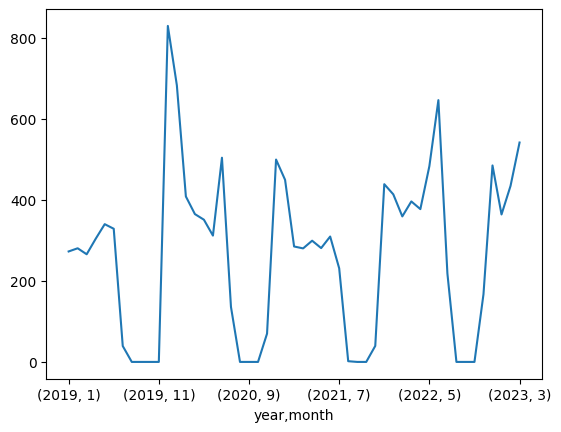

In [59]:
train_data.query('item == "RD" & corporation=="F"& location=="J"').groupby(['year','month'])['price(원/kg)'].mean().plot()

In [69]:
train_data.head()

,ID,timestamp,item,corporation,location,supply(kg),price(원/kg),month,weeknum,weekday,year,dayofyear
0,TG_A_J_20190101,2019-01-01,TG,A,J,0.0,0.0,1,1,Tuesday,2019,1
1,TG_A_J_20190102,2019-01-02,TG,A,J,0.0,0.0,1,2,Wednesday,2019,2
2,TG_A_J_20190103,2019-01-03,TG,A,J,60601.0,1728.0,1,3,Thursday,2019,3
3,TG_A_J_20190104,2019-01-04,TG,A,J,25000.0,1408.0,1,4,Friday,2019,4
4,TG_A_J_20190105,2019-01-05,TG,A,J,32352.0,1250.0,1,5,Saturday,2019,5


<Axes: >

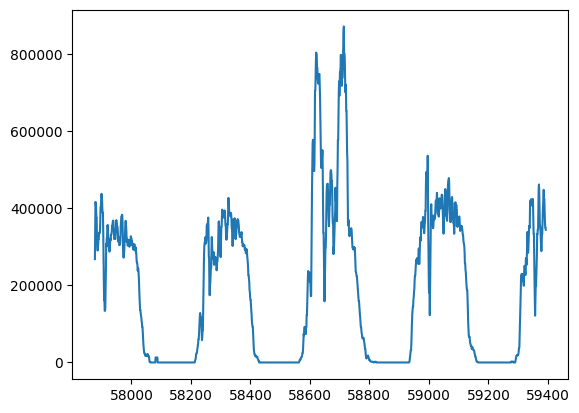

In [66]:
train_data.query('item == "RD" & corporation=="F"& location=="J"')['supply(kg)'].rolling(7,center=True).mean().plot()

In [123]:
RD_F_J_march = train_data.query('item == "RD" & corporation=="F"& location=="J" & month==3')

pd.pivot_table(data=RD_F_J_march, index='year', columns = 'weeknum', values='supply(kg)', aggfunc=sum)

weeknum,0,1,2,3,4,5,6
year,,,,,,,
2019,1568320.0,1632080.0,1564080.0,1462900.0,2128560.0,1833640.0,0.0
2020,2329920.0,1988600.0,1512740.0,1821220.0,2002920.0,1615260.0,0.0
2021,2426240.0,2415140.0,2559500.0,1801700.0,1562180.0,1776740.0,0.0
2022,1990140.0,2326020.0,2465020.0,2463140.0,1772440.0,1637700.0,0.0
2023,NaN,NaN,382980.0,477220.0,427520.0,NaN,NaN


In [108]:
train_data.query('weekday != "Sunday"')['timestamp'].unique()[train_data.query('weekday != "Sunday"').groupby(['timestamp'])['price(원/kg)'].mean()==0]

<DatetimeArray>
['2019-01-01 00:00:00', '2019-01-02 00:00:00', '2019-02-05 00:00:00',
 '2019-02-06 00:00:00', '2019-02-07 00:00:00', '2019-08-03 00:00:00',
 '2019-09-13 00:00:00', '2019-09-14 00:00:00', '2020-01-01 00:00:00',
 '2020-01-02 00:00:00', '2020-01-25 00:00:00', '2020-01-27 00:00:00',
 '2020-08-01 00:00:00', '2020-10-01 00:00:00', '2020-10-02 00:00:00',
 '2020-10-03 00:00:00', '2021-01-01 00:00:00', '2021-01-02 00:00:00',
 '2021-02-12 00:00:00', '2021-02-13 00:00:00', '2021-08-07 00:00:00',
 '2021-09-20 00:00:00', '2021-09-21 00:00:00', '2021-09-22 00:00:00',
 '2021-09-23 00:00:00', '2022-01-01 00:00:00', '2022-01-31 00:00:00',
 '2022-02-01 00:00:00', '2022-02-02 00:00:00', '2022-02-03 00:00:00',
 '2022-08-06 00:00:00', '2022-09-10 00:00:00', '2022-09-12 00:00:00',
 '2023-01-02 00:00:00', '2023-01-23 00:00:00', '2023-01-24 00:00:00']
Length: 36, dtype: datetime64[ns]

In [113]:
#sunday는 빼고 학습

array(['2023-03-04', '2023-03-05', '2023-03-06', '2023-03-07',
       '2023-03-08', '2023-03-09', '2023-03-10', '2023-03-11',
       '2023-03-12', '2023-03-13', '2023-03-14', '2023-03-15',
       '2023-03-16', '2023-03-17', '2023-03-18', '2023-03-19',
       '2023-03-20', '2023-03-21', '2023-03-22', '2023-03-23',
       '2023-03-24', '2023-03-25', '2023-03-26', '2023-03-27',
       '2023-03-28', '2023-03-29', '2023-03-30', '2023-03-31'],
      dtype=object)

In [125]:
train_march = train_data.query('weekday != "Sunday" & month == 3')
train_march.head()

,ID,timestamp,item,corporation,location,supply(kg),price(원/kg),month,weeknum,weekday,year,dayofyear,day
59,TG_A_J_20190301,2019-03-01,TG,A,J,1700.0,4307.0,3,4,Friday,2019,60,1
60,TG_A_J_20190302,2019-03-02,TG,A,J,1967.0,4538.0,3,5,Saturday,2019,61,2
62,TG_A_J_20190304,2019-03-04,TG,A,J,4891.0,3992.0,3,0,Monday,2019,63,4
63,TG_A_J_20190305,2019-03-05,TG,A,J,1210.0,4055.0,3,1,Tuesday,2019,64,5
64,TG_A_J_20190306,2019-03-06,TG,A,J,3650.0,4278.0,3,2,Wednesday,2019,65,6


In [139]:
X_train[:-28]

,ID,timestamp,item,corporation,location,supply(kg),price(원/kg),month,weeknum,weekday,year,dayofyear,day
54887,BC_E_S_20190301,2019-03-01,BC,E,S,768.0,2116.0,3,4,Friday,2019,60,1
54888,BC_E_S_20190302,2019-03-02,BC,E,S,200.0,2125.0,3,5,Saturday,2019,61,2
54890,BC_E_S_20190304,2019-03-04,BC,E,S,968.0,1964.0,3,0,Monday,2019,63,4
54891,BC_E_S_20190305,2019-03-05,BC,E,S,704.0,1842.0,3,1,Tuesday,2019,64,5
54892,BC_E_S_20190306,2019-03-06,BC,E,S,104.0,1721.0,3,2,Wednesday,2019,65,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
55646,BC_E_S_20210329,2021-03-29,BC,E,S,2168.0,2923.0,3,0,Monday,2021,88,29
55647,BC_E_S_20210330,2021-03-30,BC,E,S,1192.0,2442.0,3,1,Tuesday,2021,89,30
55648,BC_E_S_20210331,2021-03-31,BC,E,S,832.0,1823.0,3,2,Wednesday,2021,90,31
55983,BC_E_S_20220301,2022-03-01,BC,E,S,1168.0,3252.0,3,1,Tuesday,2022,60,1


In [147]:
X_train.loc[X_train['supply(kg)']==0]

,supply(kg),month,weeknum,year,dayofyear,day
87,0.0,3,4,2019,88,29
431,0.0,3,5,2020,67,7
436,0.0,3,3,2020,72,12
438,0.0,3,5,2020,74,14
441,0.0,3,1,2020,77,17


In [153]:
from sklearn.preprocessing import MinMaxScaler
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error
sp_scaler = MinMaxScaler()
pr_scaler = MinMaxScaler()
results = []

for i in train_march.item.unique():
    for j in train_march.corporation.unique():
        for k in train_march.location.unique():
            train = train_march.query('item == @i & corporation == @j & location == @k')
            if len(train) == 0:
                pass
            else:
                train = train.drop(['ID','timestamp','item','corporation','location','weekday'],axis=1)
                y = train['price(원/kg)']
                X = train.drop(['price(원/kg)'],axis=1)
                X_train, y_train = X[:-28], y[:-28]
                X_valid, y_valid = X[-28:], y[-28:]

                X_train['supply(kg)'] = sp_scaler.fit_transform(np.array(X_train['supply(kg)']).reshape(-1,1))
                X_valid['supply(kg)'] = sp_scaler.transform(np.array(X_valid['supply(kg)']).reshape(-1,1))
                y_train = pr_scaler.fit_transform(np.array(y_train).reshape(-1,1))
                y_valid = pr_scaler.transform(np.array(y_valid).reshape(-1,1))

                lgbm = LGBMRegressor(n_estimators=100)
                lgbm.fit(X_train,y_train)
                
                pred = lgbm.predict(X_valid)
                print(i+'_'+j+'_'+k+': ', mean_squared_error(y_valid,pred))
                results.append(pred)

/tmp/ipykernel_5115/4266571581.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['supply(kg)'] = sp_scaler.fit_transform(np.array(X_train['supply(kg)']).reshape(-1,1))
/tmp/ipykernel_5115/4266571581.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_valid['supply(kg)'] = sp_scaler.transform(np.array(X_valid['supply(kg)']).reshape(-1,1))
/home/hanseungsoo/miniconda3/envs/new_venv/lib/python3.8/site-packages/lightgbm/basic.py:357: UserWarning: Converting column-vector to 1d array
  _log_warning

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001200 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 86
[LightGBM] [Info] Number of data points in the train set: 81, number of used features: 5
[LightGBM] [Info] Start training from score 0.442782
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

/tmp/ipykernel_5115/4266571581.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['supply(kg)'] = sp_scaler.fit_transform(np.array(X_train['supply(kg)']).reshape(-1,1))
/tmp/ipykernel_5115/4266571581.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_valid['supply(kg)'] = sp_scaler.transform(np.array(X_valid['supply(kg)']).reshape(-1,1))
/home/hanseungsoo/miniconda3/envs/new_venv/lib/python3.8/site-packages/lightgbm/basic.py:357: UserWarning: Converting column-vector to 1d array
  _log_warning

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000014 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 59
[LightGBM] [Info] Number of data points in the train set: 81, number of used features: 4
[LightGBM] [Info] Start training from score 0.012346
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

/home/hanseungsoo/miniconda3/envs/new_venv/lib/python3.8/site-packages/lightgbm/basic.py:357: UserWarning: Converting column-vector to 1d array
  _log_warning("Converting column-vector to 1d array")
/tmp/ipykernel_5115/4266571581.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['supply(kg)'] = sp_scaler.fit_transform(np.array(X_train['supply(kg)']).reshape(-1,1))
/tmp/ipykernel_5115/4266571581.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_valid['supply(kg)'] = sp_scaler.transform(np.arr

<BarContainer object of 6 artists>

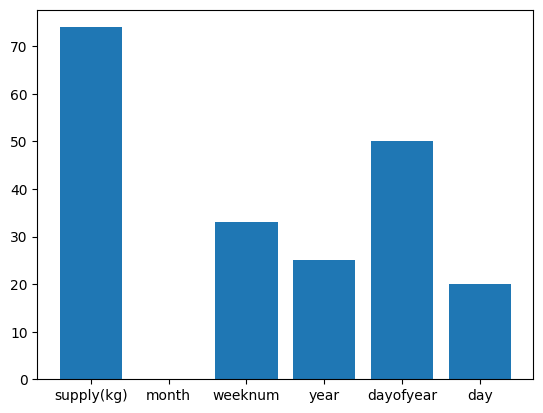

In [214]:
importances = lgbm.feature_importances_
plt.bar(height = pd.Series(importances,X_train.columns), x = X_train.columns)

In [159]:
time_data = train_data.query('item=="TG"').groupby(['timestamp'])['price(원/kg)'].mean()

<Axes: xlabel='timestamp'>

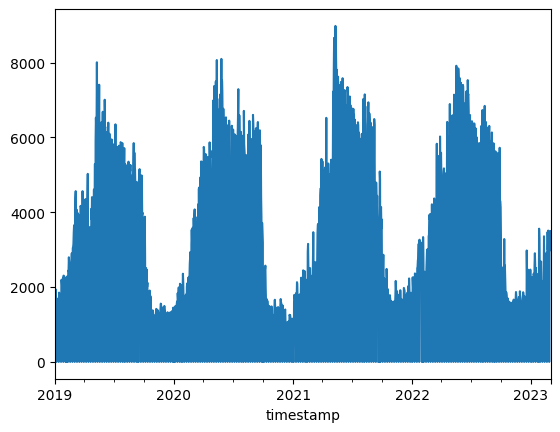

In [162]:
time_data.plot()

<Axes: xlabel='timestamp'>

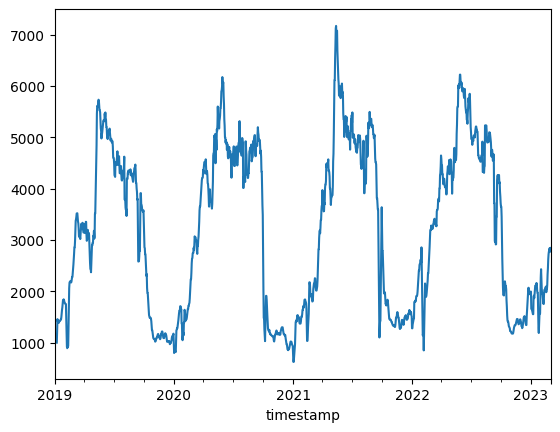

In [161]:
time_data.rolling(7).mean().plot()

In [176]:
time_data.index

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08',
               '2019-01-09', '2019-01-10',
               ...
               '2023-02-22', '2023-02-23', '2023-02-24', '2023-02-25',
               '2023-02-26', '2023-02-27', '2023-02-28', '2023-03-01',
               '2023-03-02', '2023-03-03'],
              dtype='datetime64[ns]', name='timestamp', length=1523, freq=None)

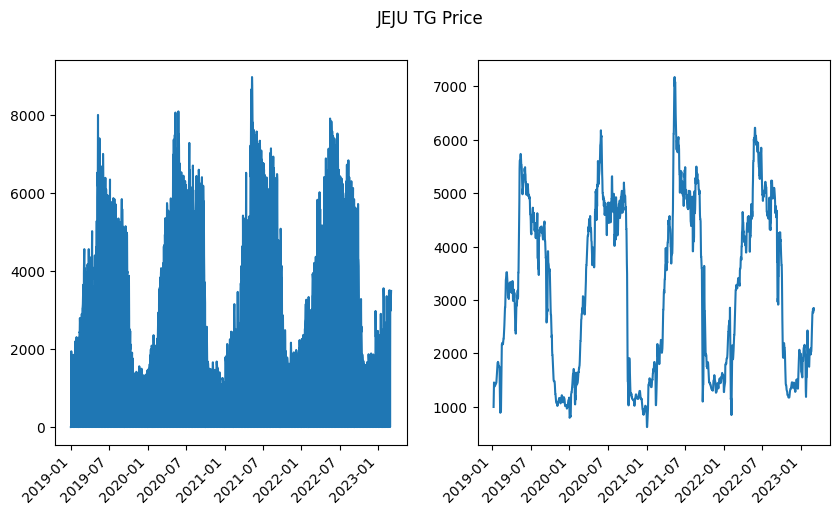

In [187]:
f, ax = plt.subplots(1,2,figsize=(10,5))
ax[0].plot(time_data)
ax[0].set_xticks(ax[0].get_xticks(), ax[0].get_xticklabels(), rotation=45, ha='right')
ax[1].plot(time_data.rolling(7).mean(),)
ax[1].set_xticks(ax[1].get_xticks(), ax[1].get_xticklabels(), rotation=45, ha='right')
plt.suptitle('JEJU TG Price')
plt.show()

<Axes: xlabel='timestamp'>

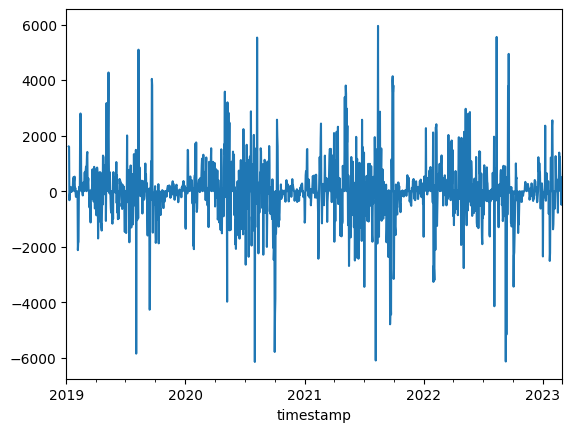

In [189]:
time_data.diff(7).plot()

In [194]:
time_data

timestamp
2019-01-01       0.0
2019-01-02       0.0
2019-01-03    1944.0
2019-01-04    1706.7
2019-01-05    1644.8
               ...  
2023-02-27    3308.4
2023-02-28    2982.0
2023-03-01    3495.4
2023-03-02    3340.3
2023-03-03    3492.2
Name: price(원/kg), Length: 1523, dtype: float64

In [197]:
train_data['timestamp'] = pd.to_datetime(train_data['timestamp'])

In [200]:
train_data.set_index('timestamp', drop=True, inplace=True)
train_data.head()

,ID,item,corporation,location,supply(kg),price(원/kg)
timestamp,,,,,,
2019-01-01,TG_A_J_20190101,TG,A,J,0.0,0.0
2019-01-02,TG_A_J_20190102,TG,A,J,0.0,0.0
2019-01-03,TG_A_J_20190103,TG,A,J,60601.0,1728.0
2019-01-04,TG_A_J_20190104,TG,A,J,25000.0,1408.0
2019-01-05,TG_A_J_20190105,TG,A,J,32352.0,1250.0


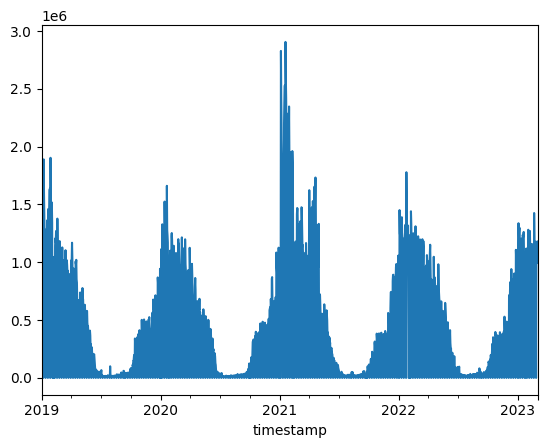

In [203]:
train_day = train_data.resample('d')['supply(kg)'].sum()
train_day.plot()
plt.show()

<Axes: xlabel='timestamp'>

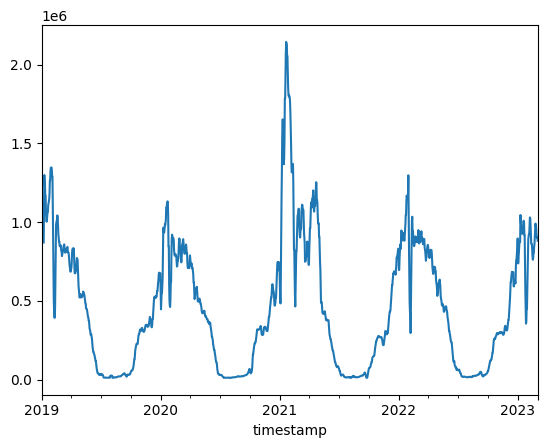

In [205]:
train_day.rolling(7).mean().plot()

<Axes: xlabel='timestamp'>

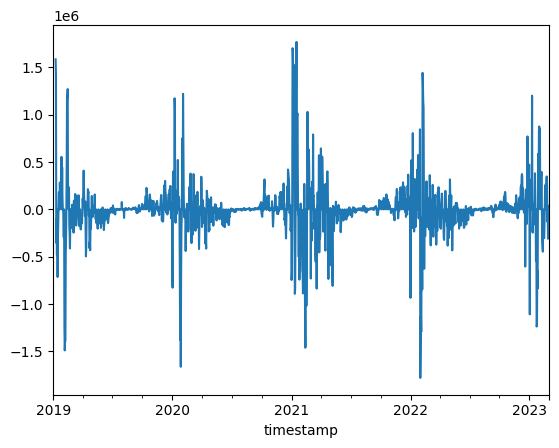

In [208]:
train_day.diff(7).plot()

In [ ]:
from sklearn.ensemble.